## 3. Linear Regression Operations
BaLinear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

* Author: [Aymeric Damien](@Snapchat)
* Project: [https://github.com/aymericdamien/TensorFlow-Examples/](https://github.com/aymericdamien/TensorFlow-Examples/)

In [52]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import numpy as np
rng = np.random

# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])


In [53]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.random(), name="weight")
b = tf.Variable(rng.random(), name="bias")

# Linear regression (Wx+b)
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [54]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [55]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.205598, W: 0.342824, b: 0.152315
step: 100, loss: 0.194434, W: 0.332388, b: 0.226296
step: 150, loss: 0.185679, W: 0.323147, b: 0.291811
step: 200, loss: 0.178812, W: 0.314964, b: 0.349829
step: 250, loss: 0.173428, W: 0.307717, b: 0.401208
step: 300, loss: 0.169205, W: 0.301299, b: 0.446707
step: 350, loss: 0.165893, W: 0.295615, b: 0.486999
step: 400, loss: 0.163296, W: 0.290583, b: 0.522680
step: 450, loss: 0.161260, W: 0.286126, b: 0.554279
step: 500, loss: 0.159663, W: 0.282179, b: 0.582261
step: 550, loss: 0.158410, W: 0.278683, b: 0.607041
step: 600, loss: 0.157428, W: 0.275588, b: 0.628985
step: 650, loss: 0.156657, W: 0.272847, b: 0.648418
step: 700, loss: 0.156053, W: 0.270419, b: 0.665627
step: 750, loss: 0.155580, W: 0.268270, b: 0.680868
step: 800, loss: 0.155208, W: 0.266366, b: 0.694363
step: 850, loss: 0.154917, W: 0.264680, b: 0.706315
step: 900, loss: 0.154688, W: 0.263188, b: 0.716899
step: 950, loss: 0.154509, W: 0.261865, b: 0.726271
step: 1000, l

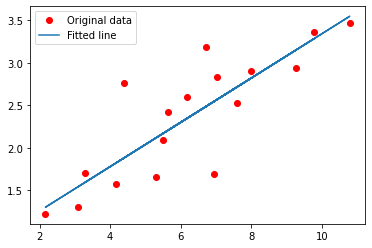

In [56]:
import matplotlib.pyplot as plt

# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()